# <font color = "slateblue"> EXAM I </font>
#### <font color = "slateblue"> Math and Stats</font>
#### <font color = "slateblue"> Date: 11th, Feb 2021 </font>

---



## <font color = "limegreen">Student Data</font>

Fill your **NAME** only:

#### Student Name: Oscar

---


## <font color = "limegreen">Instructions</font>

Read carefully these instructions and follow them during your quiz and in your submission.

 * The exam lasts **1 week**
 * Read carefully the questions and do not answer before knowing what is asked
 * Full marks require **full explanations**. Just answering the question is not enough, for example, if one answer is that the type of data is *panel data*, just saying that will not grant you more than the 25% of the available points.
 * The **answers** must be written right below the questions made in this notebook. Use Code and Text cells as needed


---

## <font color = "limegreen"> Packages </font>

In the next cell code add **ALL** the modules you will use in your exam: `numpy`, `pandas`,... 

In [ ]:
# Base Modules --------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy.stats as ss

In case you work with colab notebooks, use the following cell to connect to your drive

In [ ]:
# Not used code -- Just as backup for connecting data from Google Drive if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

---

## <font color = "limegreen">The Data </font>

**A study about the scientific reasearch status around the world contains data from countries in Europe and in America in year 2016. It contains the following variables:**

<br>

| Variable    |           Description           |
|-------------|---------------------------------|
|  country    | country name |
|  continent  | continent to which the country belongs |
|  RDExpen    | Research and development expenditure (% of GDP)|
|  STJpapers  | Scientific and technical journal articles |
| researchers | Researchers in R&D (per million people) | 
<br>

**in order to load it, use the next *code cell*, taking into account that it is an Excel file, not a .csv. Add in this same code cell a instruction that lets you see the 5 first rows of the dataset.**

In [ ]:
# We read the Excel file from the local folder
srs_df = pd.read_excel('.\science_indicators.xlsx')
srs_df.head(5)

,Country Name,Continent,RDExpen,STJpapers,researchers
0,Albania,europe,NaN,191.4,NaN
1,Austria,europe,3.15124,12366.4,5157.51761
2,Bolivia,america,NaN,95.1,NaN
3,Belgium,europe,2.55730,16393.7,4778.85093
4,Brazil,america,1.26578,53606.6,NaN



---

## Questions

## 1.- <font color = "Red"> The Data Set </font>

**In this first part, let's briefly describe the dataset**

### 1.1.- <font color = "Blue">Data (1 Point)</font>

**From the statistics point of view, what type of data can you find in the study?**

This is a **cross-sectional** dataset (multiples variables from multiple statistical units in a specific moment of time) comprising scientific research status data from 28 countries in Europe and America in the year 2016.

### 1.2.- <font color = "Blue">Variables (1 Point)</font>

**Describe the type of variables you can find in the study both, from the point of view of their nature and from the point of view of their role (again from the statistics point of view)**

- `Country Name` and `Continent` are **Categorical** variables because they are atributes, and also **Nominal** because they have no order.
- `RDExpen` `STJpapers`and `researchers` are **Numerical** variables whose elements are countable so are also **Discrete**. `RDExpen`is an **Explanatory** variable, `STJpapers` is a **Response** variable and `researchers` is a **Confounding** variable because is related with both `RDExpen`and `STJpapers`.

### 1.3.- <font color = "Blue">Population and Sample (1 Point)</font>

**Explain which is the population of interest and which are the statistical units**

The **population** is the **whole set of countries of the world**, and the **statistical units** are each one of **the 28 countries selected for the study** with all its individual data.

### 1.4.- <font color = "Blue">Sample Size (1 Point)</font>

**Determine the sample size using Python. Then determine how many countries belong to Europe and how many to America in this sample**

In [ ]:
print('The sample size is of', (len(srs_df)), 'countries.\n')

print((srs_df['Continent'].value_counts()['america']), 'of those are from America and', (srs_df['Continent'].value_counts()['europe']), 'are from Europe.')

The sample size is of 28 countries.

13 of those are from America and 15 are from Europe.


### 1.5.- <font color = "Blue">Sizes (1 Point)</font>

**If you split the `RDExpen` and `STJpapers` variables in three levels denoted by `low`, `mid` and `high` (using the own range of the variables), determine the number of countries in our sample that are in each of the levels generated by this division**

In [ ]:
# We create three different labels for the division of the ranges of the 
# variables RDExpen and STJpapers in portions of the same size 
label = ['low', 'mid', 'high']

# We create a new column with these three possible values (plus NaN) 
# that are associated to each statistical unit depending on the value of that variable (one column for RDExpen level anorth)
srs_df['RDExpen_level'] = pd.cut(srs_df['RDExpen'], 3, labels = label)
srs_df['STJpapers_level'] = pd.cut(srs_df['STJpapers'], 3, labels = label)

# Printing the individual count of the levels of each variable
print('RESEARCH AND DEVELOPMENT EXPENDITURE LEVEL\n',
      'There are', int(srs_df[['RDExpen_level']].value_counts()['low']), 'countries with', label[0].upper(), 'level of Research Expenditure\n',
      'There are', int(srs_df[['RDExpen_level']].value_counts()['mid']), 'countries with', label[1].upper(), 'level of Research Expenditure\n',
      'There are', int(srs_df[['RDExpen_level']].value_counts()['high']), 'countries with', label[2].upper(), 'level of Research Expenditure\n',
      'We have no data from', (len(srs_df) - int(srs_df[['RDExpen_level']].value_counts()['low']) -int(srs_df[['RDExpen_level']].value_counts()['mid']) - int(srs_df[['RDExpen_level']].value_counts()['high'])),'countries.\n',
      '\nSCIENTIFIC AND TECHNICAL JOURNAL ARTICLES LEVEL\n',
      'There are', int(srs_df[['STJpapers_level']].value_counts()['low']), 'countries with', label[0].upper(), 'level of Scientific Papers Publication\n',
      'There are', int(srs_df[['STJpapers_level']].value_counts()['mid']), 'countries with', label[1].upper(), 'level of Scientific Papers Publication\n',
      'There are', int(srs_df[['STJpapers_level']].value_counts()['high']), 'countries with', label[2].upper(), 'level of Scientific Papers Publication'
     )

RESEARCH AND DEVELOPMENT EXPENDITURE LEVEL
 There are 10 countries with LOW level of Research Expenditure
 There are 8 countries with MID level of Research Expenditure
 There are 6 countries with HIGH level of Research Expenditure
 We have no data from 4 countries.
 
SCIENTIFIC AND TECHNICAL JOURNAL ARTICLES LEVEL
 There are 27 countries with LOW level of Scientific Papers Publication
 There are 0 countries with MID level of Scientific Papers Publication
 There are 1 countries with HIGH level of Scientific Papers Publication


## 2.- <font color = "Red"> EDA </font>

**The next questions are for the variables in the dataset**

### 2.1.- <font color = "Blue"> Graphical Analysis (2 Points) </font> 

**Plot side by side its histogram and the boxplot. Then answer the following questions:**

 * **Is the distribution symmetric? Which value of skewness would you expect?**
 * **Do you detect any outliers? Which value of the excess kurtosis would you expect?**
 * **Which central tendency and variability measures would you use to describe the distribution?**

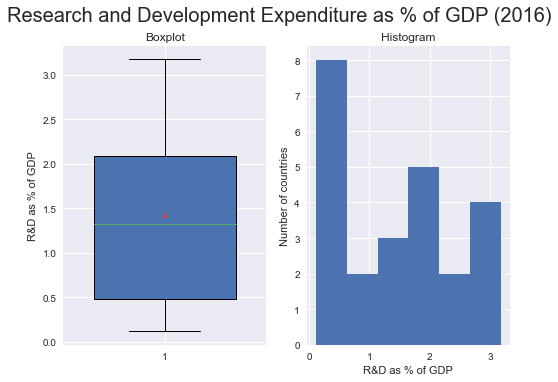

In [ ]:
# Plotting the boxplot and the histogram for R&D
plt.suptitle("Research and Development Expenditure as % of GDP (2016)", fontsize = 20)

plt.subplot2grid((1,2), (0,0))
plt.boxplot(srs_df.RDExpen.dropna(),
           patch_artist = True,
            showmeans = True,
            widths = 0.7,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red')
           )
plt.ylabel("R&D as % of GDP")
plt.title("Boxplot")

plt.subplot2grid((1,2), (0,1))
plt.hist(srs_df.RDExpen.dropna(), bins = 'rice')
plt.xlabel("R&D as % of GDP")
plt.ylabel("Number of countries")
plt.title("Histogram")

plt.show()

**Graphical Analysis - Research and Development Expenditure** 
* The distribution is slightly skewed to the right with a higher concentration of values on the left, but it looks a bit symmetric. The expected skewness will be positive.
* I do not see any outlier in the boxplot. The expected value for excess kurtosis is negative because of the relative high weigh of both tails as seen in the histogram.
* Because of the relative high weight of the tails and to fall on the safe side I would choose the median and IQR before the mean and standar deviation as measures to describe the distribution. 

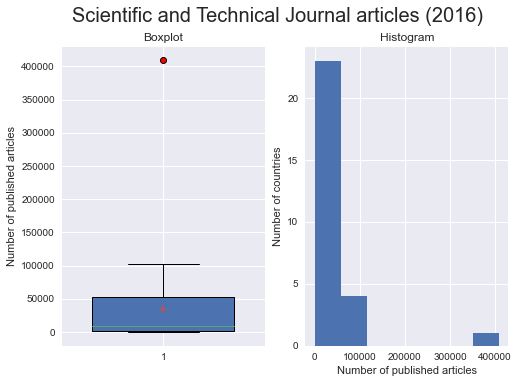

In [ ]:
# Plotting the boxplot and the histogram for PAPERS
plt.suptitle("Scientific and Technical Journal articles (2016)", fontsize = 20)

plt.subplot2grid((1,2), (0,0))
plt.boxplot(srs_df.STJpapers,
           patch_artist = True,
            showmeans = True,
            widths = 0.7,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red')
           )
plt.ylabel("Number of published articles")
plt.title("Boxplot")

plt.subplot2grid((1,2), (0,1))
plt.hist(srs_df.STJpapers,
         bins = 'rice'
        )
plt.xlabel("Number of published articles")
plt.ylabel("Number of countries")
plt.title("Histogram")

plt.show()

**Graphical Analysis - Scientific and Technical Journal articles** 
* The distribution is strongly skewed to the right with a very high concentration of values on the left, and this time is very non symmetric. The expected skewness will have a high positive number.
* There is an evident outlier in the distribution and because of this many of the observations fall into the left side of the histogram. The expected value for excess kurtosis is going to be very high in this case because of the high value of the outlier that distorts the histogram ang gives a heavy weight to the tails.
* The importance and significance of this outlier would make appropiate to approach an alternative without considering it. In case of not going for that alternative the mean should be discarded as an valid measure altogether with the standard deviation and choose the median and IQR as more robust alternatives for central tendency and variability.

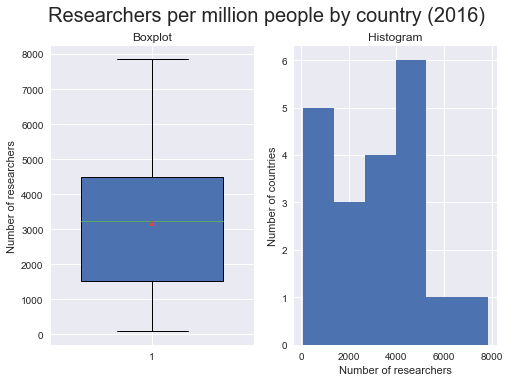

In [ ]:
# Plotting the boxplot and the histogram for RESEARCHERS
plt.suptitle("Researchers per million people by country (2016)", fontsize = 20)

plt.subplot2grid((1,2), (0,0))
plt.boxplot(srs_df.researchers.dropna(),
           patch_artist = True,
            showmeans = True,
            widths = 0.7,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red')
           )
plt.ylabel("Number of researchers")
plt.title("Boxplot")

plt.subplot2grid((1,2), (0,1))
plt.hist(srs_df.researchers.dropna(),
         bins = 'rice'
        )
plt.xlabel("Number of researchers")
plt.ylabel("Number of countries")
plt.title("Histogram")

plt.show()

**Graphical Analysis - Researchers** 
* Again, the distribution is not symmetric, but less so in this case, and right skewed so we should see a positive skewness value.
* There are no outliers in the boxplot and the tails of the distribution are relatively high but with more weight in the middle so a excess kurtosis close to the values of the normal distribution is expected.
* In this case, because the relative symmetry  of the distribution we could use both the mean and standard deviation or the median and IQR as valid measures for the central tendency and variability.

### 2.2.- <font color = "Blue">Quantitative Analysis (2 Points)</font>

**Make a summary with ALL the numerical quantities needed to describe the distribution. Then interpret them with respect to your arguments in 2.1. Did your expectations match with the numerical results? Explain.**

In [ ]:
# Subsets of the the variables to be studied
rdexpen = srs_df['RDExpen'].dropna()
stjpapers = srs_df['STJpapers']
researchers = srs_df['researchers'].dropna()

In [ ]:
# RESEARCH AND DEVELOPMENT EXPENDITURE AS % OF GDP
# central tendency values
rdexpen_mean = rdexpen.mean()
rdexpen_median = rdexpen.median()

# variability values
rdexpen_std = rdexpen.std()
rdexpen_q1 = rdexpen.quantile(0.25)
rdexpen_q3 = rdexpen.quantile(0.75)
rdexpen_iqr = rdexpen_q3 - rdexpen_q1

# shape values
rdexpen_skew = rdexpen.skew()
rdexpen_kur = rdexpen.kurt()

# quantitative description
print('RESEARCH AND DEVELOPMENT EXPENDITURE AS % OF GDP\n',
      '\nCentral Tendency\n',
      '{:<20}'.format('Mean: '),'{:<4.2f}\n'.format(rdexpen_mean),
      '{:<20}'.format('Median: '),'{:<4.2f}\n'.format(rdexpen_median),
      '\nVariability\n',
      '{:<20}'.format('Standard Deviation: '),'{:<4.2f}\n'.format(rdexpen_std),
      '{:<20}'.format('Q1: '),'{:<4.2f}\n'.format(rdexpen_q1),
      '{:<20}'.format('Q3: '),'{:<4.2f}\n'.format(rdexpen_q3),
      '{:<20}'.format('IQR: '),'{:<4.2f}\n'.format(rdexpen_iqr),
      '\nShape\n',
      '{:<20}'.format('Skewness: '),'{:<4.2f}\n'.format(rdexpen_skew),
      '{:<20}'.format('Kurtosis: '),'{:<4.2f}\n'.format(rdexpen_kur))




RESEARCH AND DEVELOPMENT EXPENDITURE AS % OF GDP
 
Central Tendency
 Mean:                1.42
 Median:              1.32
 
Variability
 Standard Deviation:  1.01
 Q1:                  0.48
 Q3:                  2.09
 IQR:                 1.61
 
Shape
 Skewness:            0.36
 Kurtosis:            -1.16



**RESEARCH AND DEVELOPMENT EXPENDITURE**

The mean and median are close to each other but the higher value of the mean reflects the right skewness identified in the graphical representation. The kurtosis is on par with the high weight of the tails and the shape of the distribution.

In [ ]:
# SCIENTIFIC AND TECHNICAL JOURNALS PUBLISHED
# central tendency values
stjpapers_mean = stjpapers.mean()
stjpapers_median = stjpapers.median()

# variability values
stjpapers_std = stjpapers.std()
stjpapers_q1 = stjpapers.quantile(0.25)
stjpapers_q3 = stjpapers.quantile(0.75)
stjpapers_iqr = stjpapers_q3 - stjpapers_q1

# shape values
stjpapers_skew = stjpapers.skew()
stjpapers_kur = stjpapers.kurt()

# quantitative description
print('SCIENTIFIC AND TECHNICAL JOURNALS PUBLISHED\n',
      '\nCentral Tendency\n',
      '{:<20}'.format('Mean: '),'{:<4.2f}\n'.format(stjpapers_mean),
      '{:<20}'.format('Median: '),'{:<4.2f}\n'.format(stjpapers_median),
      '\nVariability\n',
      '{:<20}'.format('Standard Deviation: '),'{:<4.2f}\n'.format(stjpapers_std),
      '{:<20}'.format('Q1: '),'{:<4.2f}\n'.format(stjpapers_q1),
      '{:<20}'.format('Q3: '),'{:<4.2f}\n'.format(stjpapers_q3),
      '{:<20}'.format('IQR: '),'{:<4.2f}\n'.format(stjpapers_iqr),
      '\nShape\n',
      '{:<20}'.format('Skewness: '),'{:<4.2f}\n'.format(stjpapers_skew),
      '{:<20}'.format('Kurtosis: '),'{:<4.2f}\n'.format(stjpapers_kur))

SCIENTIFIC AND TECHNICAL JOURNALS PUBLISHED
 
Central Tendency
 Mean:                36763.00
 Median:              9686.95
 
Variability
 Standard Deviation:  79230.84
 Q1:                  1194.50
 Q3:                  53017.17
 IQR:                 51822.67
 
Shape
 Skewness:            4.13
 Kurtosis:            19.24



**SCIENTIFIC AND TECHNICAL JOURNALS PUBLISHED**

The distance between the mean and the median forces us to make a choice because it's a sign of irregularities in the distribution. We can see also that the difference between standar deviation and IQR is also significative. The skewness and kurtosis reflect the right skewness of the distribution and the high weight of the tails. The main reason for this values is the same one we observed in the graphical analysis and the main culprit seems to be a very significat outlier that distorts the results. We saw that too when dividing the countries in three levels (low, mid, high) when this outlier forced all the rest to fall in the low level. In this case the numerical values match the graphical observation.

In [ ]:
# RESEARCHERS IN R&D PER MILLION PEOPLE
# central tendency values
researchers_mean = researchers.mean()
researchers_median = researchers.median()

# variability values
researchers_std = researchers.std()
researchers_q1 = researchers.quantile(0.25)
researchers_q3 = researchers.quantile(0.75)
researchers_iqr = researchers_q3 - researchers_q1

# shape values
researchers_skew = researchers.skew()
researchers_kur = researchers.kurt()

# quantitative description
print('RESEARCHERS IN R&D PER MILLION PEOPLE\n',
      '\nCentral Tendency\n',
      '{:<20}'.format('Mean: '),'{:<4.2f}\n'.format(researchers_mean),
      '{:<20}'.format('Median: '),'{:<4.2f}\n'.format(researchers_median),
      '\nVariability\n',
      '{:<20}'.format('Standard Deviation: '),'{:<4.2f}\n'.format(researchers_std),
      '{:<20}'.format('Q1: '),'{:<4.2f}\n'.format(researchers_q1),
      '{:<20}'.format('Q3: '),'{:<4.2f}\n'.format(researchers_q3),
      '{:<20}'.format('IQR: '),'{:<4.2f}\n'.format(researchers_iqr),
      '\nShape\n',
      '{:<20}'.format('Skewness: '),'{:<4.2f}\n'.format(researchers_skew),
      '{:<20}'.format('Kurtosis: '),'{:<4.2f}\n'.format(researchers_kur))

RESEARCHERS IN R&D PER MILLION PEOPLE
 
Central Tendency
 Mean:                3179.58
 Median:              3225.05
 
Variability
 Standard Deviation:  2100.09
 Q1:                  1507.83
 Q3:                  4488.47
 IQR:                 2980.64
 
Shape
 Skewness:            0.28
 Kurtosis:            -0.36



**RESEARCHERS**

The mean and the mode are close so both of them would be useful as expressed in the previous point. The skewness and kurtosis are aligned with the findings in the previous point too.

### 2.3.- <font color = "Blue"> Dependency (2 Points)</font>

**Analyze from the point of view of association, correlation and relationship the dependency of the Scientific and technical journal articles, variable `STJpapers` (independent) with the Research and development expenditure, variable `RDExpen` (response). Make the proper graph for this analysis.**

In [ ]:
srs_df[["RDExpen","STJpapers"]].cov()

,RDExpen,STJpapers
RDExpen,1.015817,3.547348e+04
STJpapers,35473.482557,6.277526e+09


Using the `cov()` function we get the covariance matrix expressed as follows:
\begin{equation}
\begin{pmatrix} s_x^2 & s_{xy} \\
s_{xy} & s_y^2\end{pmatrix}
\end{equation}
We are looking for the covariance (off-diagonal in the matrix):
\begin{equation}
s_{xy} = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)
\end{equation}
The covariance level is of 35473.48, which denotes a positive association.

In [ ]:
srs_df[["RDExpen","STJpapers"]].corr()**2

,RDExpen,STJpapers
RDExpen,1.000000,0.174565
STJpapers,0.174565,1.000000


For the correlation we use the correlation matrix as given by the `corr()` function expressed as follows:

\begin{equation}
\begin{pmatrix} 1 & r \\
r & 1\end{pmatrix}
\end{equation}

Again we look for the r in the matrix but with the $r^2$ value which denotes the strength.


\begin{equation}
r = \frac{s_{xy}}{s_x\cdot s_y}
\end{equation}

The observed correlation value is of 0.1745, a very weak one.

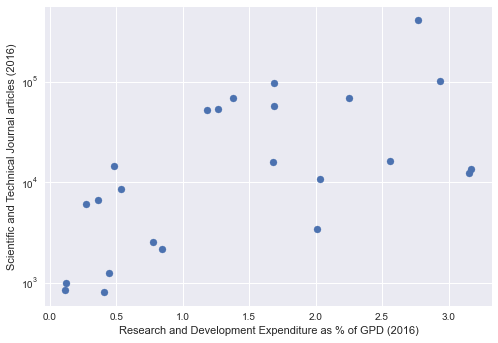

In [ ]:
# Plotting the scatterplot for R&D and PAPERS to check if there is an observable dependency
plt.scatter(x = 'RDExpen', y = 'STJpapers', data = srs_df)
plt.xlabel("Research and Development Expenditure as % of GPD (2016)")
plt.ylabel("Scientific and Technical Journal articles (2016)")
plt.yscale('log')

plt.show()

Because of the outlier when I make the graph (above) I use a logarithmic scale in the y axis to better represent it. The expression that represents the relationship will be logarithmic but with such a low correlation it will not be useful.

### 2.4.- <font color = "Blue"> Categoricals (2 Points)</font>

**Using the split of question 1.5, make a graph that shows the relative frequencies of each category. Discuss it.**

In [ ]:
RDExpen_rel_freq = srs_df['RDExpen_level'].value_counts(normalize = True)
STJpapers_rel_freq = srs_df['STJpapers_level'].value_counts(normalize = True)

levels_dct = {}

for element in [(RDExpen_rel_freq, 'RDExpen'), (STJpapers_rel_freq, 'STJpapers')]:
    levels_dct[element[1]] = [element[0].loc['low'], element[0].loc['mid'], element[0].loc['high']]
    
categoricals_df = pd.DataFrame(levels_dct, index = ['low', 'mid', 'high'])

categoricals_df

,RDExpen,STJpapers
low,0.416667,0.964286
mid,0.333333,0.000000
high,0.250000,0.035714


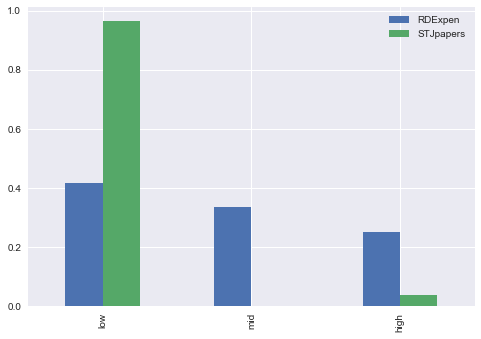

In [ ]:
categoricals_df.plot.bar()
plt.show()

By observing the values and the graph we can say that the levels are evenly distributed in the RDExpen but very unevenly in the case of the STJpapers.

## 3.- <font color = "Red"> Probability </font>



### 3.1.- <font color = "Blue"> Depedency (2 Points) </font> 

**For this question you need to split the `RDExpen` and `STJpapers` in three levels denoted by `low`, `mid` and `high` (use the own range of the variables). Then, are the events of `high` level in both variables dependent or independent? Why?**



In [ ]:
srs_df.head()

,Country Name,Continent,RDExpen,STJpapers,researchers,RDExpen_level,STJpapers_level
0,Albania,europe,NaN,191.4,NaN,NaN,low
1,Austria,europe,3.15124,12366.4,5157.51761,high,low
2,Bolivia,america,NaN,95.1,NaN,NaN,low
3,Belgium,europe,2.55730,16393.7,4778.85093,high,low
4,Brazil,america,1.26578,53606.6,NaN,mid,low


In [ ]:
expen = srs_df['RDExpen_level']
pape = srs_df['STJpapers_level']

pd.crosstab(expen, pape)

STJpapers_level,low,high
RDExpen_level,,
low,10,0
mid,8,0
high,5,1


In [ ]:
# We only use the countries for which we have data, combine them, and count them
RDExpen_notna = srs_df['RDExpen'].notna()
STJpapers_notna = srs_df['STJpapers'].notna()
not_na = RDExpen_notna & STJpapers_notna
number_countries = srs_df[not_na].shape[0]

# How many have a high RDExpen
RDE_high = srs_df['RDExpen_level'] == 'high'
number_RDE_high = srs_df[RDE_high].shape[0]

# How many have high RDExpen and STJpapers
STJ_high = srs_df['STJpapers_level'] == 'high'
both_high = set (srs_df[STJ_high]['Country Name'])&\
                      set (srs_df[RDE_high]['Country Name'])
number_both_high = len(both_high)

cp_STJ_high = number_both_high / number_RDE_high
print('The conditional probability of STJpapers being high when RDEXpen is high is', round(cp_STJ_high, 2))

number_STJ_high = srs_df[STJ_high].shape[0]
p_STJ_high = number_STJ_high / number_countries
print('The probability of STJpaper of being high is', round(p_STJ_high, 2))



The conditional probability of STJpapers being high when RDEXpen is high is 0.17
The probability of STJpaper of being high is 0.04


Because both values are not equal then we can say that RDExpen and STJpapers being high are not independent.

### 3.2.- <font color = "Blue"> Conditional Probability (2 Points) </font>

**Find the probability that for any randomly chosen country, if the `RDExpen` is not high, the `STJpapers` is high**

In [ ]:
# Countries with no high RDExpen
RDE_not_high = srs_df['RDExpen_level'] != 'high'
number_RDE_not_high = srs_df[RDE_not_high].shape[0]

# Number of countries with RDEexpen not high and STJpapers high
set_RDE_not_high = set (srs_df[RDE_not_high]['Country Name'])
STJ_high = srs_df['STJpapers_level'] == 'high'
set_STJ_high = set (srs_df[STJ_high]['Country Name'])
inters_countries = set_RDE_not_high & set_STJ_high
number_intersect = len(inters_countries)

# Conditional Probability
cp_STJ_high = number_intersect / number_RDE_not_high
print('The conditional probability of STJpapers being high, when RDExpen is not high, is', round(cp_STJ_high, 2))

The conditional probability of STJpapers being high, when RDExpen is not high, is 0.0


### 3.3.- <font color = "Blue"> Expected Value (2 Points) </font> 

**Assuming that in the world, the research and development expenditure follows a normal distribution with mean 1.5 and standard deviation of 1.1, then find the expected number of countries in the sample that should have an expenditure above 3. Is that number in agreement with what you find in the data? Can you explain?**

In [ ]:
# Compute the requested probability using the assumed normal distribution
survival = ss.norm.sf(3, 1.5, 1.1)
survival
print('The probability of RDEXpen being higher than 3 considering the normal distribution proposed is', round(survival,4))

# Number of countries with RDExpen higher that 3
RDExpen_3 = srs_df['RDExpen'] > 3
number_RDExpen_3 = srs_df[RDExpen_3].shape[0]

# Number of countries with RDExpen with values to use as denominator with the previous value
select_RDExpen_notna = srs_df['RDExpen'].notna()
number_countries = srs_df[select_RDExpen_notna].shape[0]

# Probability calculation
p_RDExpen_3 = number_RDExpen_3 / number_countries
print('The probability od RDEXpen being higher than 3 with the sampled data is', round(p_RDExpen_3, 4))

The probability of RDEXpen being higher than 3 considering the normal distribution proposed is 0.0863
The probability od RDEXpen being higher than 3 with the sampled data is 0.0833


The number of elements of the sample is enough to make estimations.